## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
from google.colab import files
#upload the haarcascade_frontalface_default.xml file
files.upload()

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


{'haarcascade_frontalface_default.xml': b'<?xml version="1.0"?>\n<!--\n    Stump-based 24x24 discrete(?) adaboost frontal face detector.\n    Created by Rainer Lienhart.\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain the above copyright notice,\n     this l

In [22]:
from google.colab import files
#upload the test images file
files.upload()

Saving mona_lisa.jpg to mona_lisa.jpg


{'mona_lisa.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x15\x16\x15\x17\x18\x1a\x18\x18\x18\x17\x16\x18\x18\x1a\x1a\x1d\x17\x18\x18\x17\x18\x16\x17\x17\x18\x1d( \x18\x1a%\x1b\x17\x18"1!%)+...\x18\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1b\x10\x10\x1b-% %--------------------------------------------------\xff\xc0\x00\x11\x08\x01\x12\x00\xb8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\x00\x07\xff\xc4\x009\x10\x00\x01\x03\x02\x03\x05\x07\x03\x03\x04\x01\x05\x01\x00\x00\x00\x01\x00\x02\x11\x03!\x041A\x05\x12Qa\xf0\x13q\x81\x91\xa1\xb1\xc1\x06"\xd1B\xe1\xf1\x142R\x92b\x15#3r\xb2\x07\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\xff\xc4\x00&\x11\x00\x02\x02\x02\x02\x02\x02\x02\x02\x03\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121\x04A\x13"Qa

In [26]:
!ls

 gdrive				       models.py       __pycache__
 haarcascade_frontalface_default.xml   mona_lisa.jpg   sample_data
'models (1).py'			       obamas.jpg


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

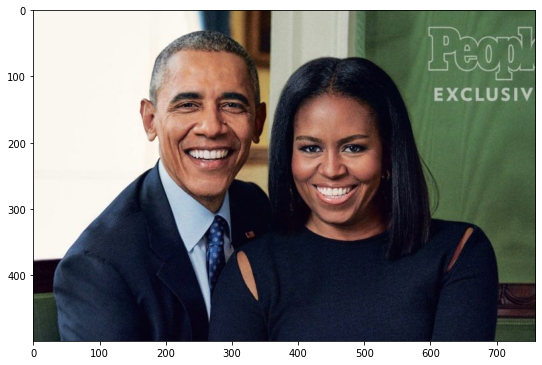

In [27]:
import cv2
# load in color image for face detection
image = cv2.imread('obamas.jpg')

#if image == None: 
 #   raise Exception("could not load image !")

    # switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='https://drive.google.com/uc?id=1XP53SY2UEt2vPo_wVhikrR8c-3AJJR2N' width=70% height=50%/>





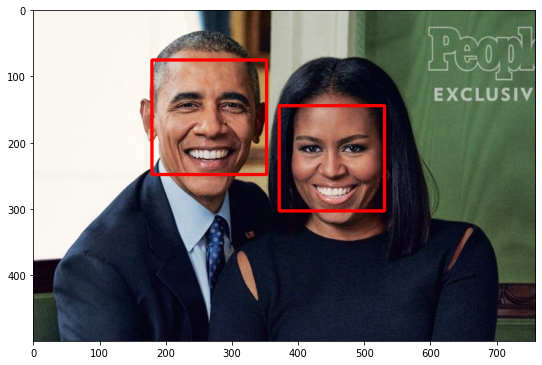

In [28]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 5)
# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    roi = image_with_detections[y-30:y+h+50, x-30:x+w+50]
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))
plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [13]:
#upload the models.py file
#upload the models.py file
from google.colab import files
src = list(files.upload().values())[0]

Saving models.py to models (1).py


In [15]:
#mount the google drive to load the saved model
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [20]:
import torch
open('models.py','wb').write(src)
#import mylib
from models import Net

model_save_name = 'facial_keypoints_model_1.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"

net = Net()
if (torch.cuda.is_available()):
    net.cuda()
# load the saved model parameters
net.load_state_dict(torch.load('saved_models/keypoints_model.pt'))
#if running on CPU
#net.load_state_dict(torch.load(path, map_location=torch.device('cpu')))

# print out net and prepare it for testing
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1))
  (fcl1): Linear(in_features=4608, out_features=2048, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fcl2): Linear(in_features=2048, out_features=1024, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fcl3): Linear(in_features=1024, out_features=136, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (dropout4): Dropout(p=0.4, inplace=False)
  (dropout5): Dropout(p=0.5, inplace=False)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

**Hint**: The sizes of faces detected by a Haar detector and the faces your network has been trained on are of different sizes. If you find that your model is generating keypoints that are too small for a given face, try adding some padding to the detected `roi` before giving it as input to your model.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='https://drive.google.com/uc?id=18v7OPzKhMvm4-rcUPW8Ii4hezgQwbIQn' width=25% height=30% align = 'center'/>




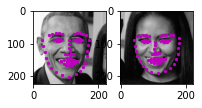

In [29]:
from torch.autograd import Variable
image_copy = np.copy(image)

face = 1

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y-30:y+h+50, x-30:x+w+50]
    
     # Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    
    # Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    
    # Rescale the detected face to be the expected square size for CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))
    roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
    
    # Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = roi.transpose((2, 0, 1))
    roi = torch.from_numpy(roi)
    # Since batch size of 1
    roi = roi.unsqueeze(0)
    
     # Make facial keypoint predictions using loaded, trained network 
    # wrap each face region in a Variable and perform a forward pass to get the predicted facial keypoints
    input_image = Variable(roi)
    if (torch.cuda.is_available()):
        input_image = input_image.type(torch.cuda.FloatTensor)
        input_image.cuda()
    else:
        input_image = input_image.type(torch.FloatTensor)
    output_pts = net(input_image)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    # un-transform the predicted key_pts data
    predicted_key_pts = output_pts[0].data
    if (torch.cuda.is_available()):
        predicted_key_pts = predicted_key_pts.cpu()
    predicted_key_pts = predicted_key_pts.numpy()
    # undo normalization of keypoints
    predicted_key_pts = predicted_key_pts*50.0+100
    
    # Display each detected face and the corresponding keypoints
    plt.subplot(1, 4, face)
    plt.imshow(np.squeeze(input_image), cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    
    face += 1

plt.show()